# Algoritmos de Aprendizaje Automático

En este notebook, exploraremos una serie de algoritmos de aprendizaje automático (Machine Learning) tanto supervisados como no supervisados, cubriendo una amplia variedad de técnicas y métodos. Los temas tratados incluyen:

## Preprocesamiento de Datos
- Limpieza y transformación de datos
- Normalización y escalado

## Algoritmos Supervisados
- **Regresión Lineal**
  - Regresión Lineal Simple
  - Regresión Lineal Múltiple
- **Regresión Logística**
- **Árboles de Decisión (CART)**
- **Random Forest**
- **Naive Bayes**
- **Máquinas de Soporte Vectorial (SVM)**
- **K-Nearest Neighbors (KNN)**

## Algoritmos No Supervisados
- **K-Means**
- **Análisis de Componentes Principales (PCA)**
- **Algoritmo Apriori**

## Otras Técnicas de Machine Learning
- **Procesamiento de Lenguaje Natural (NLP)**
- **Redes Neuronales Artificiales**
- **Redes Neuronales Convolucionales (CNN)**

A lo largo de este notebook, se explicarán cada uno de estos algoritmos con ejemplos prácticos y casos de uso.

In [3]:
#Importar Librarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
dataset = pd.read_csv("MLDatasets/Data.csv")

In [48]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Análisis de Variables y Manejo de Datos Faltantes

Este dataset contiene información sobre los clientes de una empresa, con detalles como país, edad, salario y si realizaron una compra. En este contexto, es importante entender la distinción entre variables independientes y dependientes, y cómo abordaremos los datos faltantes.

## Variables Independientes y Dependientes

- **Variables Independientes**: En este caso, las variables **Country** (País), **Age** (Edad) y **Salary** (Salario) son independientes. Estas variables representan características de cada cliente que usaremos para explicar o predecir el comportamiento de compra. Se consideran independientes porque no dependen de ninguna otra variable en nuestro análisis.

- **Variable Dependiente**: La variable **Purchased** (Compró) es dependiente, ya que su valor depende o está influenciado por los valores de las variables independientes. Aquí, el objetivo es analizar si el país, la edad o el salario de una persona afectan su decisión de compra.

## Manejo de Datos Faltantes

En este dataset, hay datos faltantes en las columnas **Age** y **Salary**. Para abordar este problema, vamos a reemplazar los valores faltantes con la media de cada columna correspondiente. Esto ayuda a mantener la consistencia de los datos sin introducir sesgos significativos.



In [49]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Salary'].fillna(dataset['Salary'].mean(), inplace=True)

In [50]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


Ahora puedes ver que los datos faltantes han sido reemplazados por la media de la columna.

## Codificación de Datos Categóricos para la Columna de País

Inicialmente, la columna **Country** contiene los nombres de los países en formato de texto. En este dataset, tenemos dos variables categóricas: **Country** y **Purchased**.


In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoderDataset = LabelEncoder()
labelencoderDataset.fit_transform(dataset['Country'])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

Los países ya no están escritos como texto. Ahora tenemos los valores codificados de cada país.


In [52]:
dataset['Country'] = labelencoderDataset.fit_transform(dataset['Country']);


In [53]:
dataset

,Country,Age,Salary,Purchased
0,0,44.000000,72000.000000,No
1,2,27.000000,48000.000000,Yes
2,1,30.000000,54000.000000,No
3,2,38.000000,61000.000000,No
4,1,40.000000,63777.777778,Yes
5,0,35.000000,58000.000000,Yes
6,2,38.777778,52000.000000,No
7,0,48.000000,79000.000000,Yes
8,1,50.000000,83000.000000,No
9,0,37.000000,67000.000000,Yes


La conversión de texto a números se realiza porque el aprendizaje automático se basa en ecuaciones matemáticas y podemos utilizar estos números en dichas ecuaciones. Sin embargo, esto trae una desventaja: los modelos de aprendizaje automático podrían interpretar que **Spain > Germany > France** debido a los valores numéricos asignados, pero no existe un orden relacional entre estos países.

Para evitar que las ecuaciones del modelo piensen que existe un orden relacional entre los países, debemos usar **variables dummy**.


In [54]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Aplicar OneHotEncoder solo a la columna 'Country'
columnTransformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Country'])],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Transformar el dataset
dataset = columnTransformer.fit_transform(dataset)

In [55]:
dataset

array([[1.0, 0.0, 0.0, 44.0, 72000.0, 'No'],
       [0.0, 0.0, 1.0, 27.0, 48000.0, 'Yes'],
       [0.0, 1.0, 0.0, 30.0, 54000.0, 'No'],
       [0.0, 0.0, 1.0, 38.0, 61000.0, 'No'],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778, 'Yes'],
       [1.0, 0.0, 0.0, 35.0, 58000.0, 'Yes'],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0, 'No'],
       [1.0, 0.0, 0.0, 48.0, 79000.0, 'Yes'],
       [0.0, 1.0, 0.0, 50.0, 83000.0, 'No'],
       [1.0, 0.0, 0.0, 37.0, 67000.0, 'Yes']], dtype=object)

Después de aplicar **OneHotEncoder**, la columna **Country** se ha reemplazado por tres nuevas columnas: una para **France**, otra para **Germany** y otra para **Spain**. Cada fila tendrá un `1` en la columna que corresponde al país del cliente y un `0` en las otras columnas. Esto evita que el modelo de aprendizaje automático piense que hay un orden entre los países, ya que ahora estamos representando las categorías de manera binaria (sin orden implícito).

## Codificación de Datos Categóricos para la Columna **Purchased**

La columna **Purchased** es una variable categórica que indica si el cliente compró el producto o no, con valores como **'Yes'** o **'No'**. Al igual que con la columna **Country**, debemos convertir estos valores de texto en formato numérico para que los modelos de aprendizaje automático puedan procesarlos.

En este caso, vamos a codificar **'Yes'** como `1` y **'No'** como `0`.


In [57]:
# Aplicar LabelEncoder a la última columna ('Purchased')
dataset[:, -1] = labelencoderDataset.fit_transform(dataset[:, -1])

In [58]:
dataset

array([[1.0, 0.0, 0.0, 44.0, 72000.0, 0],
       [0.0, 0.0, 1.0, 27.0, 48000.0, 1],
       [0.0, 1.0, 0.0, 30.0, 54000.0, 0],
       [0.0, 0.0, 1.0, 38.0, 61000.0, 0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778, 1],
       [1.0, 0.0, 0.0, 35.0, 58000.0, 1],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0, 0],
       [1.0, 0.0, 0.0, 48.0, 79000.0, 1],
       [0.0, 1.0, 0.0, 50.0, 83000.0, 0],
       [1.0, 0.0, 0.0, 37.0, 67000.0, 1]], dtype=object)

### Dividir el Conjunto de Datos en el Conjunto de Entrenamiento y el Conjunto de Prueba

In [61]:
X = dataset[:, :-1]  
y = dataset[:, -1] 

In [63]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [65]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=object)

### Dividir el Conjunto de Datos en Conjunto de Entrenamiento y Conjunto de Prueba

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [68]:
X_train, X_test

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object))

In [69]:
y_train, y_test

(array([1, 1, 1, 0, 1, 0, 0, 1], dtype=object), array([0, 0], dtype=object))

**Nota:** Esto se utilizará para establecer una relación entre las variables independientes y la variable dependiente. Además, servirá para predecir la precisión del modelo.


### Escalado de Características

En este conjunto de datos tenemos las columnas de Edad y Salario. Muchos modelos de aprendizaje automático se basan en la distancia euclidiana, por lo que al calcular la diferencia al cuadrado, el Salario dominará sobre la Edad debido a sus valores más grandes. Por eso, necesitamos aplicar un escalado de características.

La **distancia euclidiana** mide la distancia directa entre dos puntos en el espacio y es ampliamente utilizada en modelos de aprendizaje automático que dependen de la similitud entre observaciones, como los algoritmos de clasificación y agrupamiento. Esta métrica se basa en calcular la raíz cuadrada de la suma de las diferencias al cuadrado de cada característica, lo que permite determinar la "proximidad" entre puntos de datos en un espacio multidimensional.



In [71]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X_train, X_test

(array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
        [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
        [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
        [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
        [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
        [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
        [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
        [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]]),
 array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
        [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]]))

### Aprendizaje Supervisado

El aprendizaje supervisado se refiere a cuando el modelo se entrena con un conjunto de datos etiquetado. Un conjunto de datos etiquetado es aquel que contiene tanto los parámetros de entrada como los de salida. En este tipo de aprendizaje, tanto los conjuntos de entrenamiento como de validación están etiquetados.

#### 1. Regresión Lineal
En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una respuesta escalar (o variable dependiente) y una o más variables explicativas (o variables independientes). El caso de una sola variable explicativa se conoce como regresión lineal simple.

**a) Regresión Lineal Simple**
La regresión lineal simple es una prueba paramétrica, lo que significa que asume ciertas condiciones sobre los datos. Estas suposiciones incluyen:
- Homogeneidad de varianza (homocedasticidad): el tamaño del error en la predicción no cambia significativamente a lo largo de los valores de la variable independiente.


In [72]:
dataset = pd.read_csv("MLDatasets/Salary_Data.csv") 
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [81]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [82]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [83]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state= 0)

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Este código entrena un modelo de Regresión Lineal Simple utilizando el conjunto de datos de entrenamiento (X_train, y_train).

In [86]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

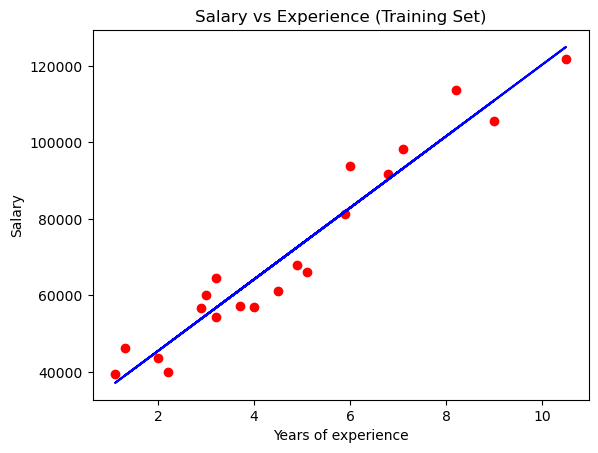

In [87]:
#visualizing the traning set results
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

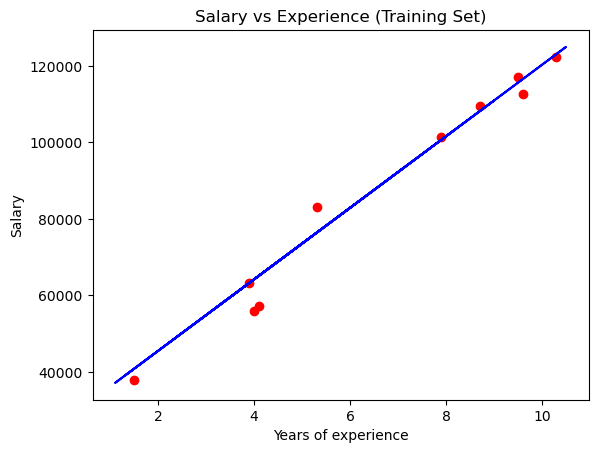

In [88]:
#visualizing the test set results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [89]:
#checking Accuracy
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 97.49154407708353 %


### b) Regresión Lineal Múltiple
La **Regresión Lineal Múltiple** (MLR, por sus siglas en inglés), también conocida simplemente como regresión múltiple, es una técnica estadística que utiliza varias variables explicativas para predecir el resultado de una variable de respuesta. El objetivo de la regresión lineal múltiple es modelar la relación lineal entre las variables explicativas (independientes) y las variables de respuesta (dependientes).


In [116]:
dataset = pd.read_csv("MLDatasets/50_Startups.csv")

In [117]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [118]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [119]:
#Crear dummy variables para la columna State

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=str)

In [120]:
X = X[:, 1:]

## Eliminar una columna de variables dummy para evitar el Dummy Variable Trap

En este paso, eliminamos la primera columna de las variables dummy (`California`) para evitar el Dummy Variable Trap, que ocurre cuando las variables dummy son completamente lineales entre sí.

La sintaxis `X[:, 1:]` significa:

- `:`: Selecciona todas las filas.
- `1:`: Selecciona todas las columnas a partir de la columna de índice 1 en adelante (excluye la columna de índice 0, que corresponde a `California`).

Esto nos permite mantener las columnas `Florida` y `New York`, y eliminar la redundante `California`, lo que evita la multicolinealidad y mejora el rendimiento del modelo.

### ¿Por qué eliminar una columna?
Si tenemos 4 estados (California, Florida, New York, y otro estado), solo necesitamos 3 columnas para representarlos. Al eliminar una columna, evitamos que el modelo aprenda información redundante, ya que si las tres columnas de las variables dummy son `0`, la observación se puede identificar como el cuarto estado.


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [122]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)
X_train, y_train

(array([[1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
         2.1463481e+05],
        [0.0000000e+00, 1.0000000e+00, 4.6014020e+04, 8.5047440e+04,
         2.0551764e+05],
        [1.0000000e+00, 0.0000000e+00, 7.5328870e+04, 1.4413598e+05,
         1.3405007e+05],
        [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
         2.1079767e+05],
        [1.0000000e+00, 0.0000000e+00, 9.1749160e+04, 1.1417579e+05,
         2.9491957e+05],
        [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
         3.2387668e+05],
        [1.0000000e+00, 0.0000000e+00, 1.1994324e+05, 1.5654742e+05,
         2.5651292e+05],
        [0.0000000e+00, 1.0000000e+00, 1.0002300e+03, 1.2415304e+05,
         1.9039300e+03],
        [0.0000000e+00, 1.0000000e+00, 5.4205000e+02, 5.1743150e+04,
         0.0000000e+00],
        [0.0000000e+00, 1.0000000e+00, 6.5605480e+04, 1.5303206e+05,
         1.0713838e+05],
        [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261

In [123]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [124]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [125]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [126]:
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 93.47068473282447 %


## 2. Regresión Polinómica

En estadística, la **regresión polinómica** es una forma de análisis de regresión en la que la relación entre la variable independiente \(x\) y la variable dependiente \(y\) se modela como un polinomio de grado \(n\) en \(x\). La regresión polinómica ajusta una relación no lineal entre el valor de \(x\) y la media condicional correspondiente de \(y\), denotada como \(E(y | x)\).

### Características:
- La regresión polinómica es útil cuando los datos muestran una relación no lineal.
- A diferencia de la regresión lineal, la regresión polinómica puede modelar curvas y otros comportamientos complejos en los datos.

### Ejemplo de fórmula:
Si se tiene una relación de segundo grado, la regresión polinómica se puede expresar como:

\[
y = \beta_0 + \beta_1x + \beta_2x^2 + \epsilon
\]

donde:
- \( \beta_0 \) es el intercepto,
- \( \beta_1 \) y \( \beta_2 \) son los coeficientes del modelo,
- \( x^2 \) es el término cuadrático,
- \( \epsilon \) es el término de error.

La regresión polinómica es particularmente útil para capturar relaciones más complejas entre variables cuando la regresión lineal no es suficiente.


In [131]:
dataset = pd.read_csv("MLDatasets/Position_Salaries.csv")
display(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
}